## Exercise: Car-following models

The stability analysis can be carried out as follows: first follow the five steps below, at steps 2-5, the attributes for all time intervals are updated altogether:
1. Fill in initial position, and initialize with zeros for speed, and acceleration of leader and follower(s): `init_all()`;
2. Fill in leader acceleration: `init_acc_L()`;
3. Calculate leader speed and position: `calc_speed_L()`, `calc_pos()`;
4. Calculate follower speed and acceleration: `calc_speed_F_acc_F()`
5. Calculate follower position: `calc_pos()`

It is important to be consistent with the update intervals, for example: 
- use current speed and current acceleration to calculate the next speed;
- use current position and current speed to calculate the next position

In the solution, we consider: each time interval, say for 1 second, includes left end but excludes right end, except for the last one at 20 seconds (same as python convention)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def init_all(pos0_L, pos0_F, speed0_L, speed0_F, acc0_L, acc0_F, T, dT):
    times = np.linspace(0, int(T), int(T/dT)+1).round(2)

    speed_L = np.zeros(int(T/dT) + 1) # [m/s]
    acc_L = np.zeros(int(T/dT) + 1) # [m/s^2]
    pos_L = np.zeros(int(T/dT) + 1) # [metres]

    speed_F = np.zeros(int(T/dT) + 1) # [m/s]
    acc_F = np.zeros(int(T/dT) + 1) # [m/s^2]
    pos_F = np.zeros(int(T/dT) + 1) # [metres]
    
    speed_L[0], acc_L[0], pos_L[0] = speed0_L, acc0_L, pos0_L
    speed_F[0], acc_F[0], pos_F[0] = speed0_F, acc0_F, pos0_F
    
    return times, speed_L, acc_L, pos_L, speed_F, acc_F, pos_F

In [3]:
def init_acc_L(acc_L, times):
    acc_L[(times<2) & (times>=1)] = -3
    acc_L[(times<3) & (times>=2)] = 3
    return acc_L

In [4]:
def calc_speed_L(acc_L, speed_L, speed0_L, t_0, dT, times):    
    # calculate speed_L using acc_L

    # new_speed
    # = old_speed + dT * prev_acc
    # = old_speed + dspeed
    
    dspeed = dT * np.cumsum(acc_L)
    new_speeds = speed0_L + dspeed
    speed_L[times>t_0] = new_speeds[:-1]
    return speed_L

In [5]:
def calc_pos(speed, pos, t_0, dT, times):
    '''Calculates pos for either L or F'''
    dpos = dT * np.cumsum(speed)
    new_pos = pos[0] + dpos
    pos[times>t_0] = new_pos[:-1]
    return pos

In [6]:
def calc_speed_F_acc_F(speed_L, speed_F, acc_F, times, dT, tau, C):
    speed_F[times<=tau] = speed_F[0]
    acc_F[times==tau] = C / tau * (speed_L[0] - speed_F[0])

    for t in times[:-1]:
        v_L_prev, v_F_prev, acc_F_prev = speed_L[times==t], speed_F[times==t], acc_F[times==t]
        acc_F[times==np.round(t+tau, 2)] = C / tau * (v_L_prev - v_F_prev)
        speed_F[times==np.round(t+dT, 2)] = v_F_prev + dT * acc_F_prev
        
    return speed_F, acc_F

In [7]:
# Initialization
T = 20.0 # [seconds]
dT = 0.10 # [seconds]
speed0_L = 20 # [m/s]
speed0_F = 30 # [m/s]
pos0_L = 0 # [m]
pos0_F = -70 # [m]
acc0_L = 0 # [m/s^2]
acc0_F = 0 # [m/s^2]
t_0 = 0

tau = 1 # [second]
C = 0.4 # sensitivity, [seconds^{-1}]

# Step 1
times, speed_L, acc_L, pos_L, speed_F, acc_F, pos_F = init_all(pos0_L, pos0_F, 
                                                               speed0_L, speed0_F, 
                                                               acc0_L, acc0_F, T, dT)

# Step 2
acc_L = init_acc_L(acc_L, times)

# Step 3
speed_L = calc_speed_L(acc_L, speed_L, speed0_L, t_0, dT, times)
pos_L = calc_pos(speed_L, pos_L, t_0, dT, times)

# Step 4
speed_F, acc_F = calc_speed_F_acc_F(speed_L, speed_F, acc_F, times, dT, tau, C=0.4)

# Step 5
pos_F = calc_pos(speed_F, pos_F, t_0, dT, times)

In [8]:
pd.DataFrame(np.array([times, acc_L, speed_L, acc_F, speed_F]).T, columns=['times', 'acc_L', 'speed_L', 'acc_F', 'speed_F']).head(25)

times  acc_L  speed_L  acc_F  speed_F
0     0.0    0.0     20.0   0.00   30.000
1     0.1    0.0     20.0   0.00   30.000
2     0.2    0.0     20.0   0.00   30.000
3     0.3    0.0     20.0   0.00   30.000
4     0.4    0.0     20.0   0.00   30.000
5     0.5    0.0     20.0   0.00   30.000
6     0.6    0.0     20.0   0.00   30.000
7     0.7    0.0     20.0   0.00   30.000
8     0.8    0.0     20.0   0.00   30.000
9     0.9    0.0     20.0   0.00   30.000
10    1.0   -3.0     20.0  -4.00   30.000
11    1.1   -3.0     19.7  -4.00   29.600
12    1.2   -3.0     19.4  -4.00   29.200
13    1.3   -3.0     19.1  -4.00   28.800
14    1.4   -3.0     18.8  -4.00   28.400
15    1.5   -3.0     18.5  -4.00   28.000
16    1.6   -3.0     18.2  -4.00   27.600
17    1.7   -3.0     17.9  -4.00   27.200
18    1.8   -3.0     17.6  -4.00   26.800
19    1.9   -3.0     17.3  -4.00   26.400
20    2.0    3.0     17.0  -4.00   26.000
21    2.1    3.0     17.3  -3.96   25.600
22    2.2    3.0     17.6  -3.92   25.204
23    2.3    3.0     17.9  -3.88   24.812
24    2.4    3.0     18.2  -3.84   24.424

In [9]:
my_list = [0 , 1, 2, 3]

In [10]:
print(4, 't')

4 t


Text(0.5, 1.0, 'Acceleration of the leader')

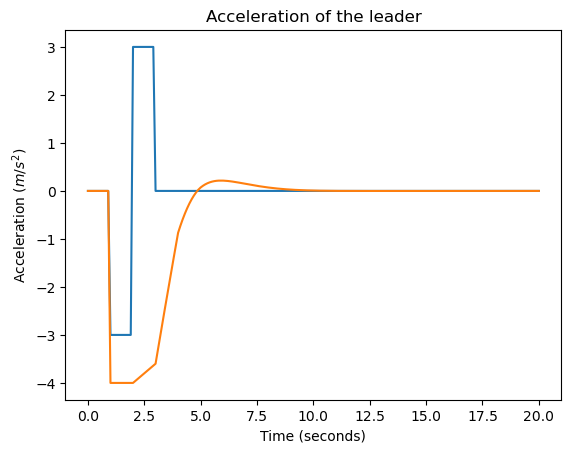

In [11]:
plt.plot(times, acc_L)
plt.plot(times, acc_F)
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration ($m/s^2$)')
plt.title('Acceleration of the leader')

Note that besides the tasks in a) and b) you can also plot other data to check how they evolve over the 20 seconds.

**a)** Draw a graph showing the relative speed over the simulated 20 seconds

Text(0.5, 1.0, 'Relative speed: leader - follower')

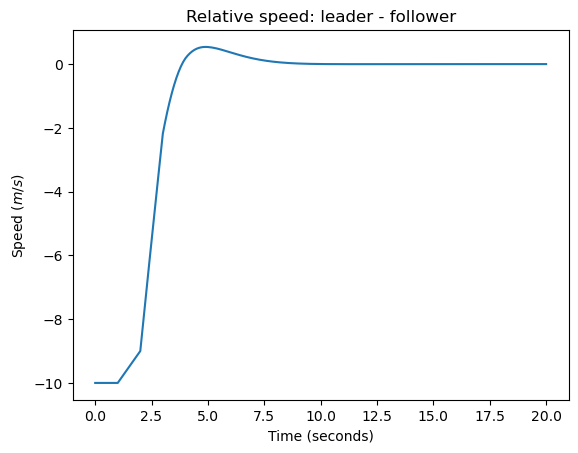

In [12]:
plt.plot(times, speed_L - speed_F)
plt.xlabel('Time (seconds)')
plt.ylabel('Speed ($m/s$)')
plt.title('Relative speed: leader - follower')

In [13]:
speed_F

array([30.        , 30.        , 30.        , 30.        , 30.        ,
       30.        , 30.        , 30.        , 30.        , 30.        ,
       30.        , 29.6       , 29.2       , 28.8       , 28.4       ,
       28.        , 27.6       , 27.2       , 26.8       , 26.4       ,
       26.        , 25.6       , 25.204     , 24.812     , 24.424     ,
       24.04      , 23.66      , 23.284     , 22.912     , 22.544     ,
       22.18      , 21.82      , 21.488     , 21.18384   , 20.90736   ,
       20.6584    , 20.4368    , 20.2424    , 20.07504   , 19.93456   ,
       19.8208    , 19.7336    , 19.6608    , 19.60128   , 19.5539264 ,
       19.517632  , 19.491296  , 19.473824  , 19.464128  , 19.4611264 ,
       19.463744  , 19.470912  , 19.481568  , 19.495136  , 19.5110848 ,
       19.52892774, 19.54822246, 19.56857062, 19.58961766, 19.61105254,
       19.63260749, 19.65405773, 19.67522125, 19.69595853, 19.71615309,
       19.7357097 , 19.75455259, 19.77262369, 19.78988086, 19.80

**b)** Draw a graph showing the distance between the vehicle over the simulated 20 seconds

Text(0.5, 1.0, 'Distance: leader - follower')

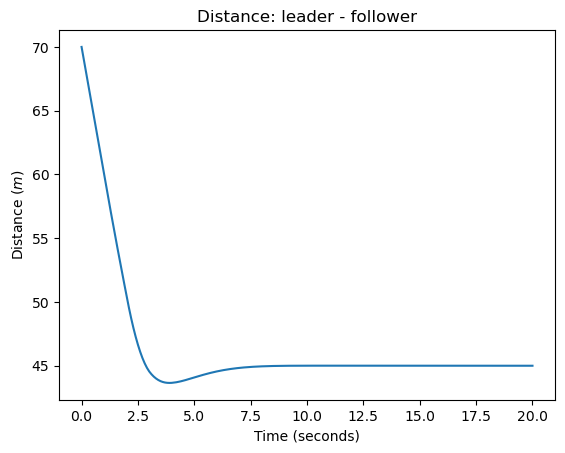

In [14]:
plt.plot(times, pos_L - pos_F)
plt.xlabel('Time (seconds)')
plt.ylabel('Distance ($m$)')
plt.title('Distance: leader - follower')

**c)** What will be the distance of cars after the end of 4 and 10 seconds?

In [15]:
(pos_L - pos_F)[times==4]

array([43.65936])

In [16]:
(pos_L - pos_F)[times==10]

array([45.00453404])

**d)** Repeat parts b) and c) for C = 0.8 and C = 1.1. Comment on the results.

In [17]:
pos_diff = {}
pos_diff[C] = pos_L - pos_F

In [18]:
for C_ in [0.8, 1.1]:
    # Step 1
    times, speed_L, acc_L, pos_L, speed_F, acc_F, pos_F = init_all(pos0_L, pos0_F, 
                                                                   speed0_L, speed0_F, 
                                                                   acc0_L, acc0_F, T, dT)

    # Step 2
    acc_L = init_acc_L(acc_L, times)

    # Step 3
    speed_L = calc_speed_L(acc_L, speed_L, speed0_L, t_0, dT, times)
    pos_L = calc_pos(speed_L, pos_L, t_0, dT, times)

    # Step 4
    speed_F, acc_F = calc_speed_F_acc_F(speed_L, speed_F, acc_F, times, dT, tau, C_)

    # Step 5
    pos_F = calc_pos(speed_F, pos_F, t_0, dT, times)

    pos_diff[C_] = pos_L - pos_F

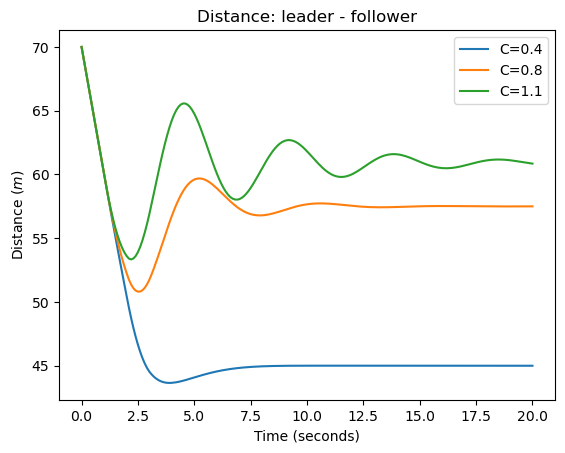

In [19]:
for C_ in pos_diff.keys():
    plt.plot(times, pos_diff[C_], label=f'C={C_}')
    
plt.xlabel('Time (seconds)')
plt.ylabel('Distance ($m$)')
plt.title('Distance: leader - follower')
plt.legend()

**Observation**: A higher sensitivity requires more time for the distance between vehicles to stabilize, and eventually leads to higher distances between vehicles.

**e)** Repeat a) and b) for six consecutive vehicles for values of C = 0.5, 0.8, and 1, initial speeds of 20m/s and initial relative distance of 30m for each pair. Comment on the results.

In [20]:
n_veh = 6

all_v = {}
rel_dist = {}

In [21]:
pos0_L = 0

for C_ in [0.5, 0.8, 1]:
    all_v[C_] = {}
    rel_dist[C_] = {}
    
    # initialize with leader attributes
    # Step 1
    times, speed_L, acc_L, pos_L, speed_F, acc_F, pos_F = init_all(pos0_L=pos0_L, pos0_F=pos0_L-30, 
                                                                   speed0_L=20, speed0_F=20, 
                                                                   acc0_L=0, acc0_F=0, T=T, dT=dT)

    # Step 2
    acc_L = init_acc_L(acc_L, times)

    # Step 3
    speed_L = calc_speed_L(acc_L, speed_L, speed0_L, t_0, dT, times)
    pos_L = calc_pos(speed_L, pos_L, t_0, dT, times)
    
    all_v[C_][0] = speed_L
    
    for i in range(n_veh-1):

        # Step 4
        speed_F, acc_F = calc_speed_F_acc_F(speed_L, speed_F, acc_F, times, dT, tau, C_)

        # Step 5
        pos_F = calc_pos(speed_F, pos_F, t_0, dT, times)
        
        # save data        
        all_v[C_][i+1] = speed_F
        rel_dist[C_][i] = pos_L - pos_F
        
        # F becomes the L in the next iteration
        speed_L, acc_L, pos_L = speed_F, acc_F, pos_F
        _, _, _, _, speed_F, acc_F, pos_F = init_all(pos0_L=None, pos0_F=pos_F[0]-30, 
                                                     speed0_L=None, speed0_F=20, 
                                                     acc0_L=None, acc0_F=0, T=T, dT=dT)
        
        
        

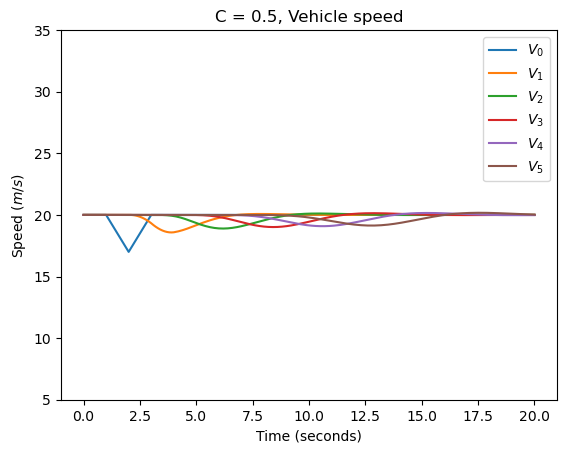

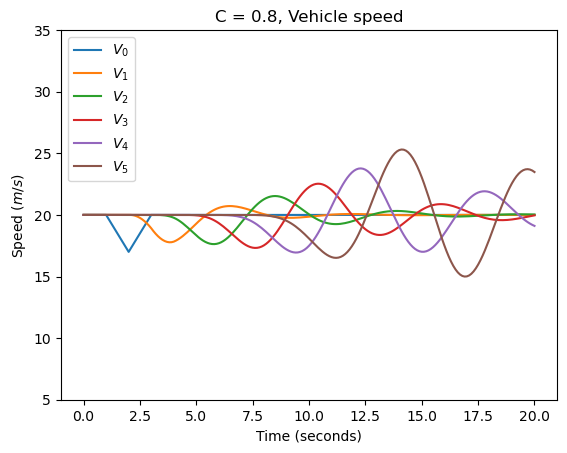

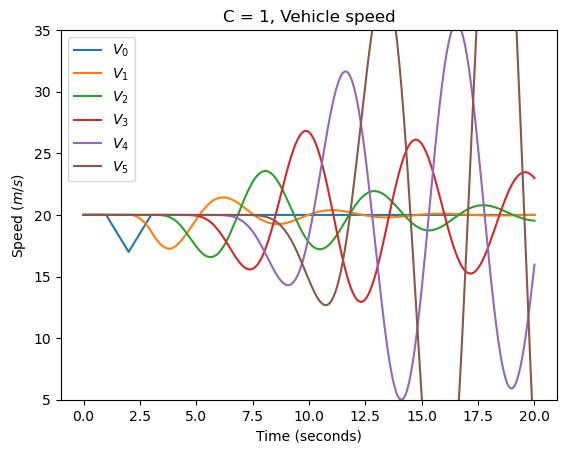

In [22]:
for C_ in all_v.keys():
    for i in all_v[C_].keys():
        plt.plot(times, all_v[C_][i], label=f'$V_{i}$')
        plt.ylim(5, 35)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Speed ($m/s$)')
    plt.title(f'C = {C_}, Vehicle speed')
    plt.legend()
    plt.show()

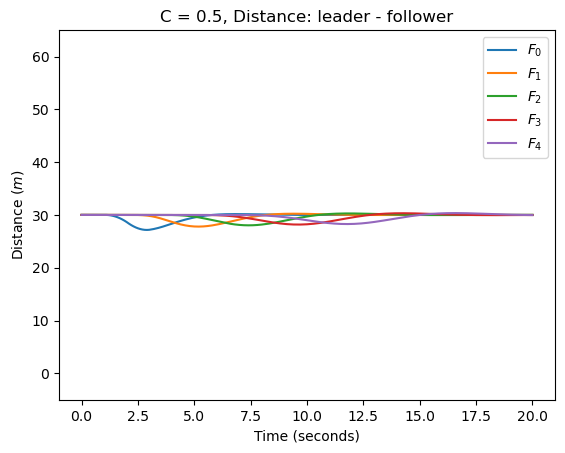

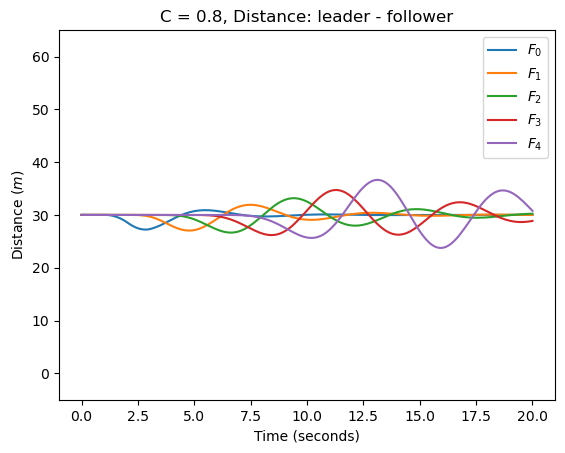

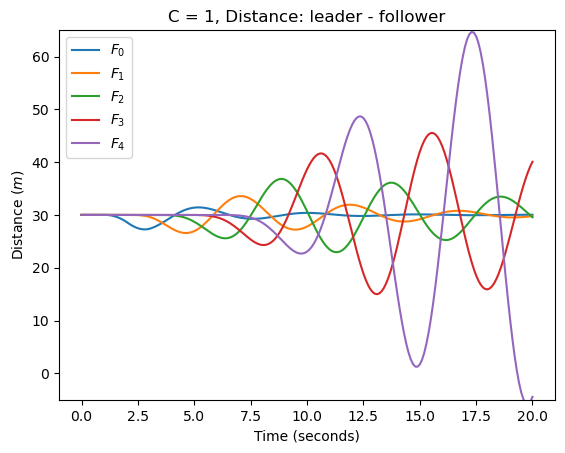

In [23]:
for C_ in rel_dist.keys():
    for i in rel_dist[C_].keys():
        plt.plot(times, rel_dist[C_][i], label=f'$F_{i}$')
        plt.ylim(-5, 65)
        
    plt.xlabel('Time (seconds)')
    plt.ylabel('Distance ($m$)')
    plt.title(f'C = {C_}, Distance: leader - follower')
    plt.legend()
    plt.show()